# Algorithms 1 -- Liner Regression

## load dataset and split to train_set and test_set

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('coursework_other.csv')
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=1)

### see the shape

In [2]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(7654, 4) (1914, 4) (7654,) (1914,)


## Instantiate and fit the estimator

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Xtrain, Ytrain)

LinearRegression()

In [4]:
ypred = reg.predict(Xtest)
# ypred = reg.predict(Xtrain)

## Calculating mean squared error

The equation for the mean squared error is 
$$ MSE = \frac{\sum_{i = 1}^n (y_i - f(x_i))^2}{n} $$

In [5]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Ytest, ypred)
# mean_squared_error(Ytrain, ypred)

20.329991554850068

## Calculating R^2

$R^2$ is defined as

$$R^2(y, \hat{y})) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

This represents the proportion of the variance of y that is explained by the independent variables in the model. It is essentially a comparison of the fitted model with the mean of the target values ($\bar{y}$).

In [6]:
from sklearn.metrics import r2_score
r2_score(Ytest, ypred)
# r2_score(Ytrain, ypred)

0.9321860060402446

# Algorithms 2 -- KNN Regression

In [7]:
from sklearn.neighbors import KNeighborsRegressor

X_train, Xval, Y_train, Yval = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=1)

mse_tr = []
mse_val = []
k_neighbors = range(1, 19, 2)

for k in k_neighbors:
    clf = KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train, Y_train)
    pred_tr = clf.predict(X_train)
    pred_v = clf.predict(Xval)
    mse_tr.append(mean_squared_error(pred_tr, Y_train))
    mse_val.append(mean_squared_error(pred_v, Yval))

## Plot the mean squared error against degree on the training set and on the validation set.

Text(0, 0.5, 'MSE')

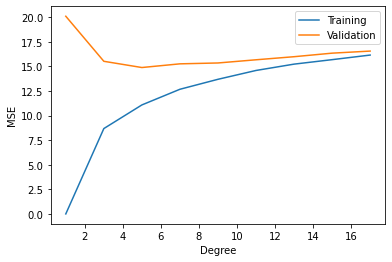

In [8]:
import matplotlib.pyplot as plt

plt.plot(k_neighbors, mse_tr, label='Training')
plt.plot(k_neighbors, mse_val, label='Validation')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MSE')

In [9]:
clf = KNeighborsRegressor(n_neighbors=5)
clf.fit(Xtrain, Ytrain)
ypred= clf.predict(Xtest)
print(mean_squared_error(Ytest, ypred), r2_score(Ytest, ypred))

15.10024803970743 0.9496306662699407


# Algorithms 3 -- Polynomial Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures

X_train, Xval, Y_train, Yval = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=1)

mse_tr = []
mse_val = []
max_deg = 10
for i in range(max_deg):
    poly = PolynomialFeatures(degree=i+1)
    Xtrain_new = poly.fit_transform(X_train) 
    Xval_new = poly.fit_transform(Xval)
    reg.fit(Xtrain_new, Y_train)
    pred_tr = reg.predict(Xtrain_new)
    pred_v = reg.predict(Xval_new)
    mse_tr.append(mean_squared_error(pred_tr, Y_train))
    mse_val.append(mean_squared_error(pred_v, Yval))

## Plot the mean squared error against degree on the training set and on the validation set. 

Text(0, 0.5, 'MSE')

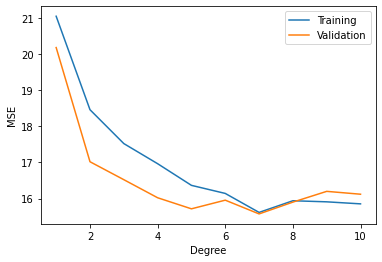

In [11]:
plt.plot(range(1, max_deg+1), mse_tr, label='Training')
plt.plot(range(1, max_deg+1), mse_val, label='Validation')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MSE')

In [12]:
poly = PolynomialFeatures(degree=7)

Xtrain_new = poly.fit_transform(Xtrain) 
Xtest_new = poly.fit_transform(Xtest)
reg.fit(Xtrain_new, Ytrain)
pred_test = reg.predict(Xtest_new)
print(mean_squared_error(Ytest, pred_test), r2_score(Ytest, pred_test))

15.830823424122482 0.947193713230772


#  Generate a baseline

In [13]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(Xtrain, Ytrain)
dummy_regr.score(Xtest, Ytest)

-1.3508382452620538e-06

In [14]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(Xtrain, Ytrain)
dummy_regr.score(Xtest, Ytest)

-0.027881147510675053